In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
 


In [17]:
# Load the training and test data
data_train = pd.read_csv("SalaryData_Train.csv")
data_test = pd.read_csv("SalaryData_Test.csv")


In [18]:
# Combine train and test data for consistent label encoding
combined_data = pd.concat([data_train, data_test], axis=0)

In [19]:
# Encode categorical variables
le = LabelEncoder()
for col in combined_data.columns:
    if combined_data[col].dtype == "object":
        combined_data[col] = le.fit_transform(combined_data[col])

In [20]:
# Split the combined data back into train and test
X_train = combined_data[:len(data_train)].drop("Salary", axis=1)
y_train = combined_data[:len(data_train)]["Salary"]

X_test = combined_data[len(data_train):].drop("Salary", axis=1)
y_test = combined_data[len(data_train):]["Salary"]

In [21]:
# Create and train a Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [22]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [25]:
# Create and train Bernoulli Naive Bayes for categorical features
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train, y_train)

BernoulliNB()

In [27]:
# Make predictions using both classifiers
y_pred_gnb = nb_classifier.predict(X_test)
y_pred_bnb = nb_classifier.predict(X_test)

In [28]:
# Evaluate both models
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
classification_rep_gnb = classification_report(y_test, y_pred_gnb)

In [29]:
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
classification_rep_bnb = classification_report(y_test, y_pred_bnb)

In [30]:
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_gnb)
print("Classification Report:\n", classification_rep_gnb)

Gaussian Naive Bayes:
Accuracy: 0.7946879150066402
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



In [31]:
print("\nBernoulli Naive Bayes:")
print("Accuracy:", accuracy_bnb)
print("Classification Report:\n", classification_rep_bnb)


Bernoulli Naive Bayes:
Accuracy: 0.7946879150066402
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



In [ ]:
### Inference: Gaussian Naive Bayes and Bernoulli Naive Bayes have an accuracy of approximately 0.795, which means they correctly predict the salary category for about 79.5% of the samples in the test dataset.
###Naive Bayes models have reasonably high accuracy but lower recall for class 1 (">50K"), which means they are better at identifying the majority class ("<50K") but struggle to identify the minority class (">50K")

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Basic EDA
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data_train.head())

First few rows of the dataset:
   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   Unite

In [34]:
# Summary statistics
print("\nSummary statistics:")
print(data_train.describe())


Summary statistics:
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000


In [35]:
# Check for missing values
print("\nMissing value counts:")
print(data_train.isnull().sum())


Missing value counts:
age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


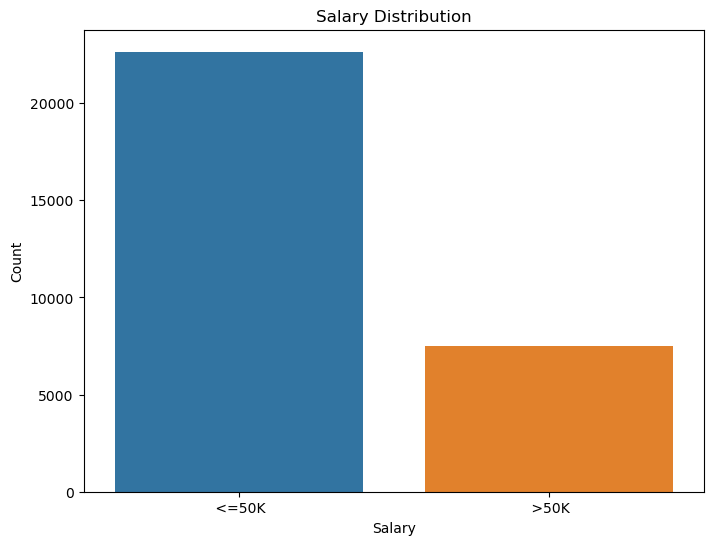

In [36]:
# Data Visualization
# Count plot for the 'Salary' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data_train, x='Salary')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


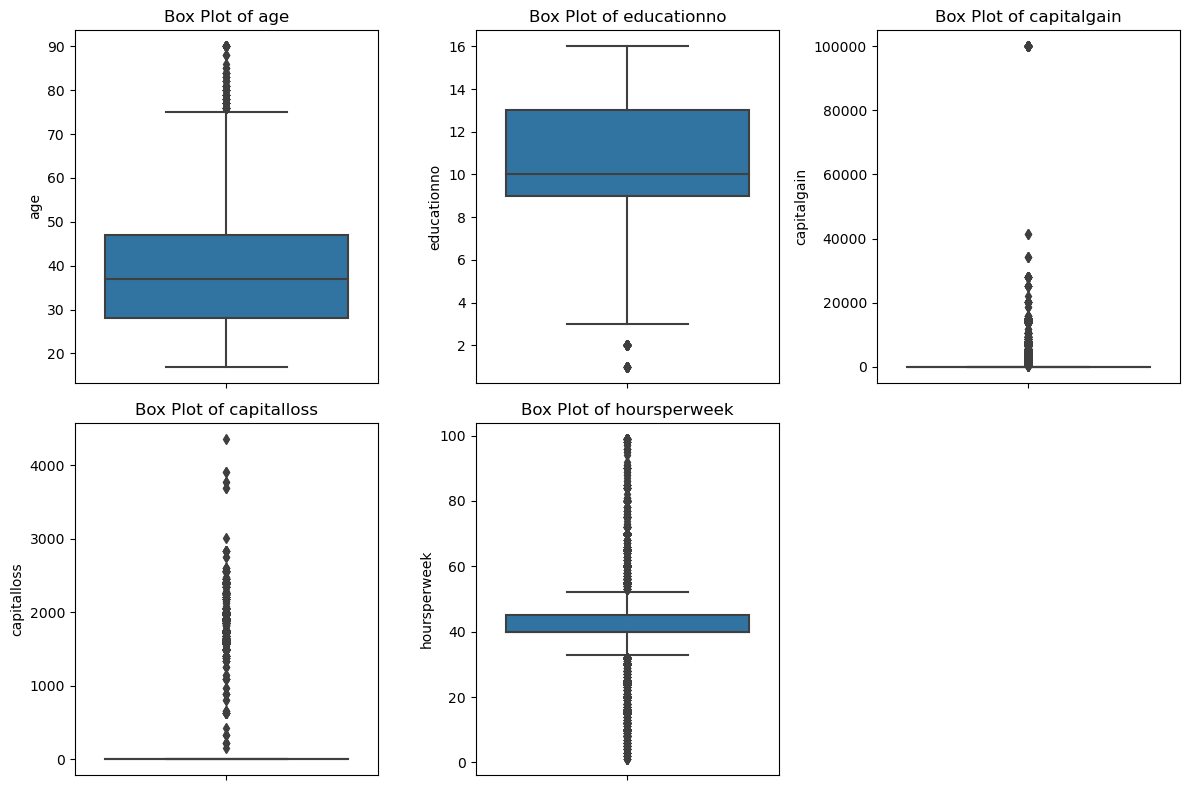

In [37]:
# Box plots for numeric features
numeric_features = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data_train, y=feature)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

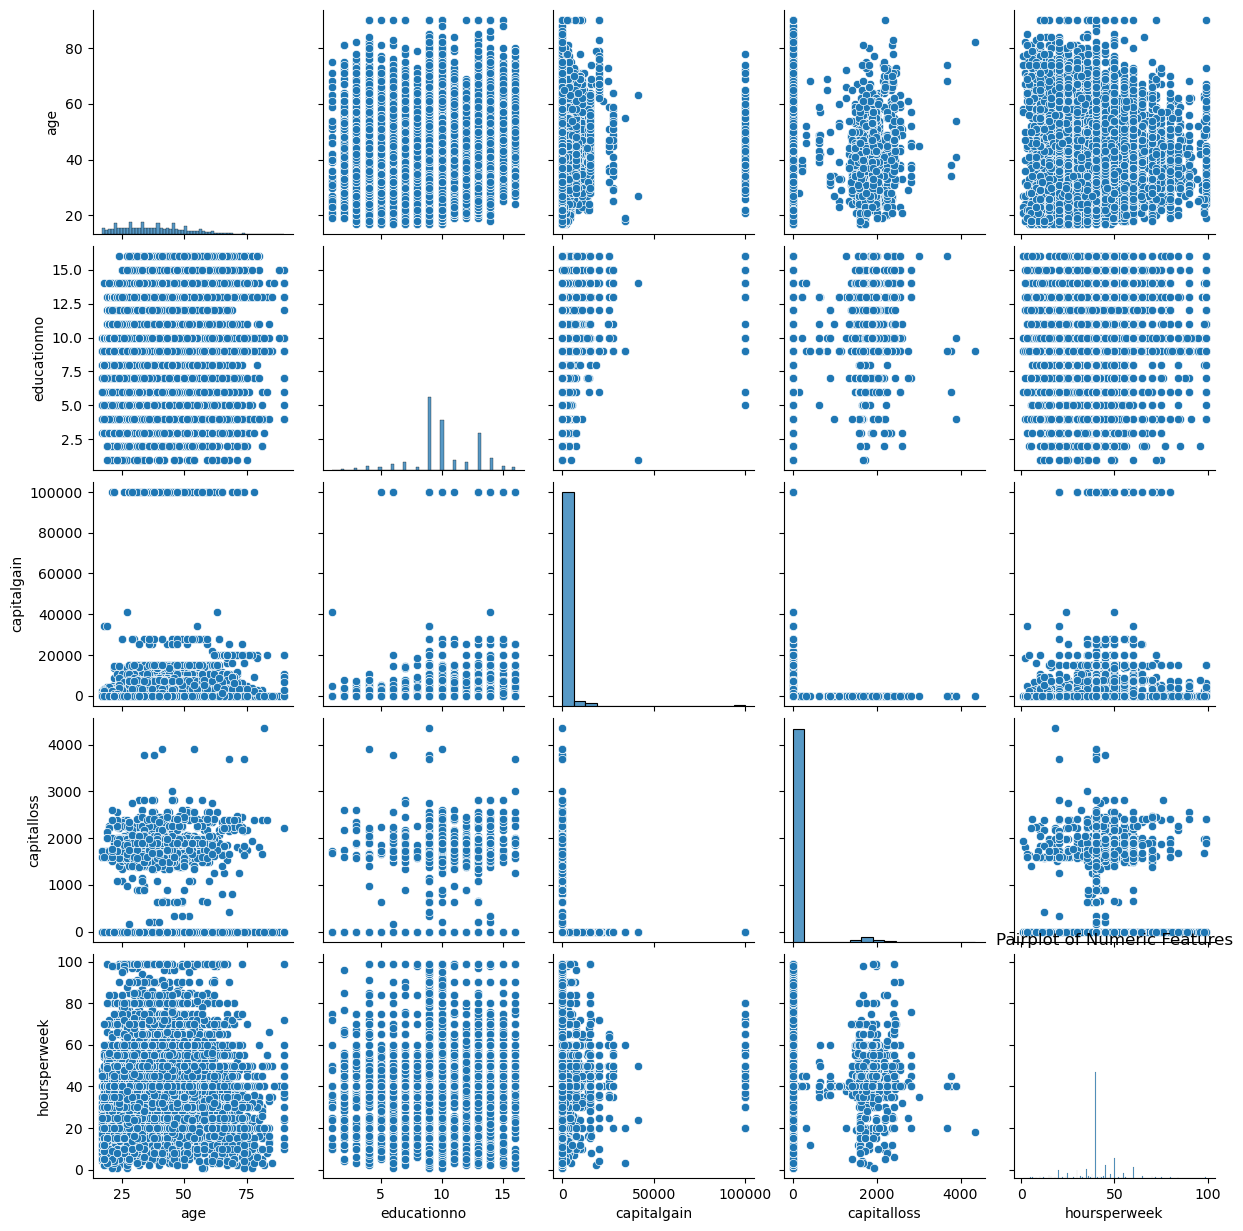

In [38]:
# Pairplot for numeric features (scatter plots)
sns.pairplot(data_train[numeric_features])
plt.title('Pairplot of Numeric Features')
plt.show()


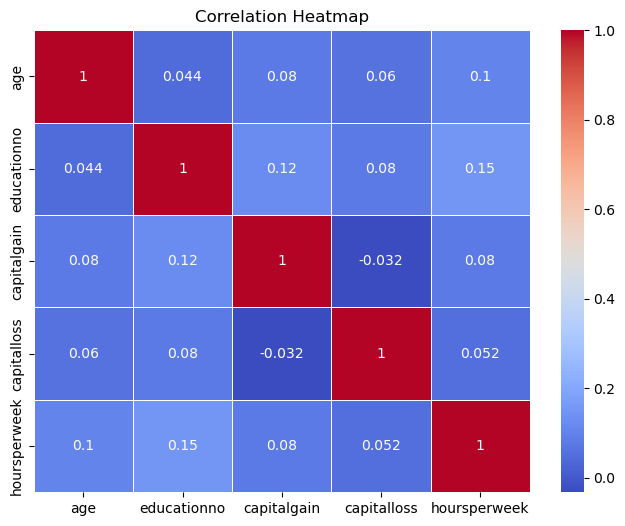

In [39]:
# Correlation heatmap
correlation_matrix = data_train[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()